# Movie Profits by Month

## In this notebook, movie data from [The Numbers](https://www.the-numbers.com/) will be analyzed.

#### Work Flow
1. Importing and Inspecting
2. Cleaning the Data
3. Caluclating ROI and Profit Margins
4. Scatter Plots: Profit Measures vs. Production Budgets; Descriptive Stats
5. Bar Plots: Median Profit Measures by Month

## Part 1 - Importing and Inspecting

In [1]:
# Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the 'The Numbers' movie budgets data
tnum_df = pd.read_csv('data/tn.movie_budgets.csv')

In [3]:
# Inspecting the data
tnum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# Further Insepction of the DF
tnum_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Notes:
We are going to need to turn the $ columns and year of release into integers with no symbols.

## Part 2 - Cleaning the Data

In [5]:
# Making a copy of the DF so we can clean it up without destroying the original
tnum_df_clean = tnum_df.copy()

In [6]:
# Making a Year column
tnum_df_clean['year'] = tnum_df_clean['release_date'].str[-4:].astype('int64')

In [7]:
# Creating a dataframe that only goes back to 2010; to keep things relevant.
tnum_df_clean = tnum_df_clean[tnum_df_clean['year'] > 2010]

In [8]:
# Cleaning up product budget 
tnum_df_clean['production_budget_int'] = tnum_df_clean['production_budget'].str.replace(',', '')
tnum_df_clean['production_budget_int'] = tnum_df_clean['production_budget_int'].str.strip('$')

In [9]:
# Changing the new product budget column into integers
tnum_df_clean['production_budget_int'] = tnum_df_clean['production_budget_int'].astype('int64')

In [10]:
# We only want to use relevant films, lets grab only production budgets over $1
tnum_df_clean = tnum_df_clean[tnum_df_clean['production_budget_int'] > 1]

In [11]:
# Cleaning up worldwide gross 
tnum_df_clean['worldwide_gross_int'] = tnum_df_clean['worldwide_gross'].str.replace(',', '')
tnum_df_clean['worldwide_gross_int'] = tnum_df_clean['worldwide_gross_int'].str.strip('$')

In [12]:
# Changing the new ww gross column into integers
tnum_df_clean['worldwide_gross_int'] = tnum_df_clean['worldwide_gross_int'].astype('int64')

In [13]:
# Only want relevant rows, taking out worldwide_gross_int if > $100,000
tnum_df_clean = tnum_df_clean[tnum_df_clean['worldwide_gross_int'] > 100000]

# Let's see what we have now
tnum_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1 to 5748
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1545 non-null   int64 
 1   release_date           1545 non-null   object
 2   movie                  1545 non-null   object
 3   production_budget      1545 non-null   object
 4   domestic_gross         1545 non-null   object
 5   worldwide_gross        1545 non-null   object
 6   year                   1545 non-null   int64 
 7   production_budget_int  1545 non-null   int64 
 8   worldwide_gross_int    1545 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 120.7+ KB


## Part 3 - Caluclating ROI and Profit Margins

In [14]:
# Adding a column 'profit_amount' that is the worldwide gross minus the production budget
tnum_df_clean['profit_amount'] = (tnum_df_clean['worldwide_gross_int'] - tnum_df_clean['production_budget_int'])

In [15]:
# Adding a ROI column that is the net profit amount divided by production budget. ROI = net / expense 
tnum_df_clean['ROI_perc'] = (tnum_df_clean['profit_amount']  / tnum_df_clean['production_budget_int']) * 100

In [16]:
# Adding a profit margin that is the profit amount divided by worldwide gross. Profit Margin = net / gross
tnum_df_clean['profit_margin_perc'] = (tnum_df_clean['profit_amount']  / tnum_df_clean['worldwide_gross_int']) * 100

In [17]:
# Adding a column for boolean entries if a film is profitable or not
tnum_df_clean['is_profit'] = tnum_df_clean['profit_amount'] > 0

In [18]:
# Let's check out what we got in order from highest ROI
tnum_df_clean.sort_values('ROI_perc', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,production_budget_int,worldwide_gross_int,profit_amount,ROI_perc,profit_margin_perc,is_profit
5679,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,100000,41656474,41556474,41556.474000,99.759941,True
5211,12,"Jan 6, 2012",The Devil Inside,"$1,000,000","$53,262,945","$101,759,490",2012,1000000,101759490,100759490,10075.949000,99.017291,True
5062,63,"Apr 1, 2011",Insidious,"$1,500,000","$54,009,150","$99,870,886",2011,1500000,99870886,98370886,6558.059067,98.498061,True
5213,14,"Apr 17, 2015",Unfriended,"$1,000,000","$32,789,645","$64,364,198",2015,1000000,64364198,63364198,6336.419800,98.446341,True
4249,50,"Jan 20, 2017",Split,"$5,000,000","$138,141,585","$278,964,806",2017,5000000,278964806,273964806,5479.296120,98.207659,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,11,"Dec 31, 2013",Space Pirate Captain Harlock,"$30,000,000",$0,"$310,985",2013,30000000,310985,-29689015,-98.963383,-9546.767529,False
820,21,"Oct 26, 2018",Air Strike,"$65,000,000",$0,"$516,279",2018,65000000,516279,-64483721,-99.205725,-12490.091791,False
2005,6,"Jun 5, 2015",United Passions,"$30,000,000",$918,"$168,832",2015,30000000,168832,-29831168,-99.437227,-17669.143290,False
2154,55,"Mar 17, 2015",Accidental Love,"$26,000,000",$0,"$135,436",2015,26000000,135436,-25864564,-99.479092,-19097.259222,False


#### Notes:
The Gallows had an insane ROI, need to be careful of that outlier in our analysis. Median measures are probably best for the profitability measures analysis.

## Part 4 - Scatter Plots: Profit Measures vs. Production Budgets; Descriptive Stats

In [19]:
# Finding the mean and median of the profit_amounts and production_budget_int columns

print('mean profit:', round(tnum_df_clean['profit_amount'].mean()))
print('median profit:', tnum_df_clean['profit_amount'].median())
print('mean expense:', round(tnum_df_clean['production_budget_int'].mean()))
print('median expense:', tnum_df_clean['production_budget_int'].median())

# Loading these into pandas dataframes

mean_pe = pd.DataFrame({'mean_profit': 98727759, 'mean_expense': 44481840}, index=[0])
median_pe = pd.DataFrame({'median_profit': 24238443, 'median_expense': 25000000}, index=[0])

# descripitve stats
tnum_df_clean.loc[0:, ['profit_amount', 'production_budget_int']].describe()

mean profit: 98727759.0
median profit: 24238443.0
mean expense: 44481840.0
median expense: 25000000.0


,profit_amount,production_budget_int
count,1.545000e+03,1.545000e+03
mean,9.872776e+07,4.448184e+07
std,1.979686e+08,5.534790e+07
min,-2.002376e+08,2.500000e+04
25%,-1.300720e+05,9.000000e+06
50%,2.423844e+07,2.500000e+07
75%,1.063996e+08,5.500000e+07
max,1.748134e+09,4.106000e+08


In [20]:
# Finding the IQR of the profit_amount column to get a look at the center of the data

#Select the first quantile
q_1 = tnum_df_clean['profit_amount'].quantile(.25)

# Select the third quantile
q_3 = tnum_df_clean['profit_amount'].quantile(.75)

# Creating a mask inbeetween q1 & q3
mask = tnum_df_clean['profit_amount'].between(q_1, q_3)

# Filtering the initial dataframe with a mask
iqr_profit = tnum_df_clean.loc[mask]
iqr_profit.describe()

,id,year,production_budget_int,worldwide_gross_int,profit_amount,ROI_perc,profit_margin_perc
count,773.000000,773.000000,7.730000e+02,7.730000e+02,7.730000e+02,773.000000,773.000000
mean,52.538163,2014.297542,2.642169e+07,5.946526e+07,3.304357e+07,373.736985,55.611800
std,28.442746,2.345088,3.216557e+07,4.840275e+07,2.887722e+07,1630.150842,25.439222
min,1.000000,2011.000000,2.500000e+04,1.448220e+05,-1.300720e+05,-18.580000,-22.819946
25%,28.000000,2012.000000,5.500000e+06,2.092779e+07,8.495213e+06,58.801779,37.028413
50%,54.000000,2014.000000,1.700000e+07,4.816382e+07,2.423844e+07,144.122456,59.036951
75%,78.000000,2016.000000,3.500000e+07,8.752765e+07,5.273720e+07,306.539022,75.402115
max,100.000000,2019.000000,2.750000e+08,3.134777e+08,1.063996e+08,41556.474000,99.759941


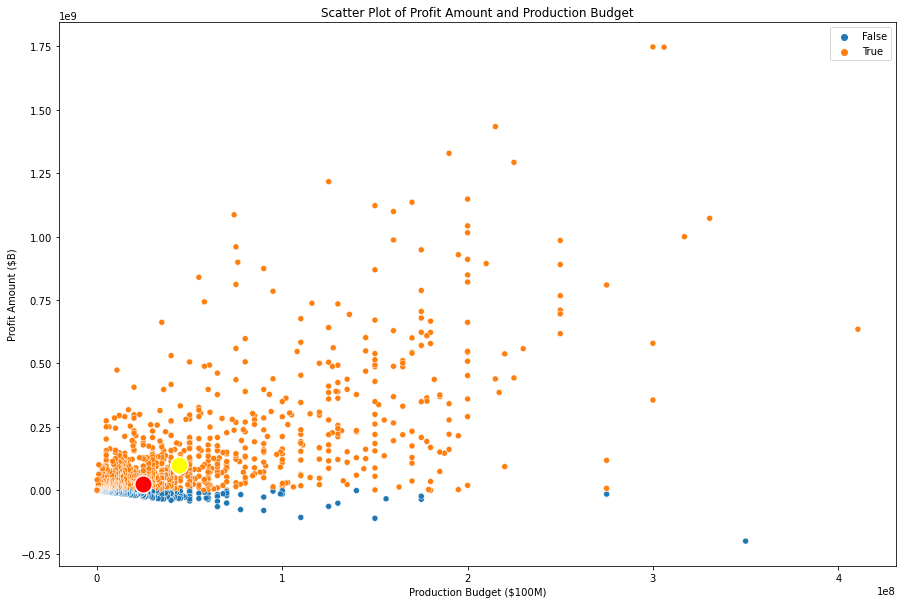

In [21]:
# Plotting a Scatter plot of the production budgets vs. the profit amount

fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=tnum_df_clean, x="production_budget_int", y='profit_amount', hue='is_profit')
sns.scatterplot(data=median_pe, x='median_expense', y='median_profit', s=300, color='red')
sns.scatterplot(data=mean_pe, x='mean_expense',  y='mean_profit', s=300, color='yellow')

ax.set_xlabel('Production Budget ($100M)')
ax.set_ylabel('Profit Amount ($B)')
ax.set_title('Scatter Plot of Profit Amount and Production Budget');

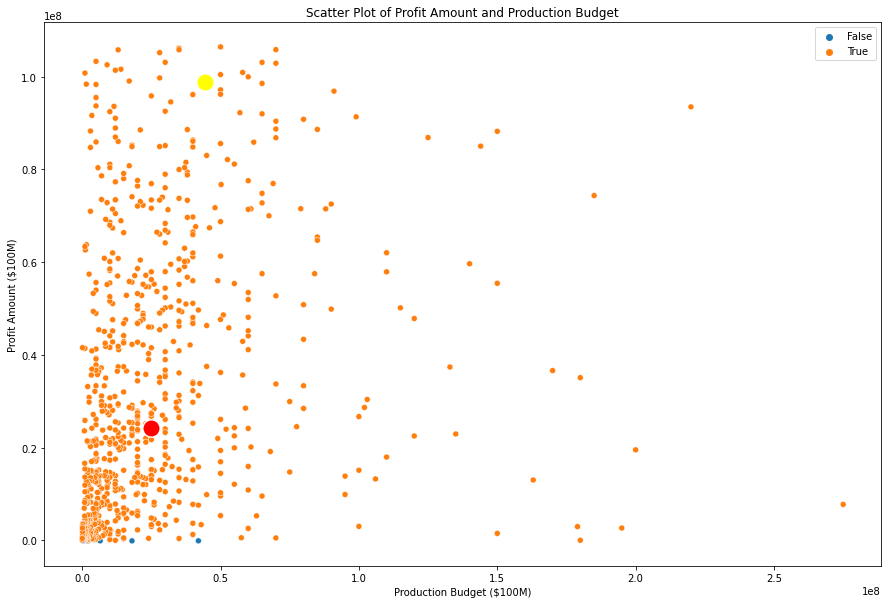

In [22]:
# Plotting a Scatter plot of the production budgets vs. the profit amount only within the IQR

fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=iqr_profit, x="production_budget_int", y='profit_amount', hue='is_profit')
sns.scatterplot(data=median_pe, x='median_expense', y='median_profit', s=300, color='red')
sns.scatterplot(data=mean_pe, x='mean_expense', y='mean_profit', s=300, color='yellow')

ax.set_xlabel('Production Budget ($100M)')
ax.set_ylabel('Profit Amount ($100M)')
ax.set_title('Scatter Plot of Profit Amount and Production Budget');
# ax.set_xticklabels();

In [23]:
# Finding the mean and median of the profit_amounts and production_budget_int columns

print('mean roi:', round(tnum_df_clean['ROI_perc'].mean()))
print('median roi:', tnum_df_clean['ROI_perc'].median())
print('mean expense:', round(tnum_df_clean['production_budget_int'].mean()))
print('median expense:', tnum_df_clean['production_budget_int'].median())

# Loading these into pandas dataframes

mean_roi = pd.DataFrame({'mean_roi': 308, 'mean_expense': 44481840}, index=[0])
median_roi = pd.DataFrame({'median_roi': 132.02, 'median_expense': 25000000}, index=[0])

# descripitve stats
tnum_df_clean.loc[0:, ['ROI_perc', 'production_budget_int']].describe()

mean roi: 308.0
median roi: 132.02634857142857
mean expense: 44481840.0
median expense: 25000000.0


,ROI_perc,production_budget_int
count,1545.000000,1.545000e+03
mean,307.963798,4.448184e+07
std,1219.386820,5.534790e+07
min,-99.483540,2.500000e+04
25%,-1.485586,9.000000e+06
50%,132.026349,2.500000e+07
75%,326.940862,5.500000e+07
max,41556.474000,4.106000e+08


In [24]:
# Finding the IQR of the ROI column to get a look at the center of the data

# Selecting the first quantile
q1 = tnum_df_clean['ROI_perc'].quantile(.25)

# Selecting the third quantile
q3 = tnum_df_clean['ROI_perc'].quantile(.75)

# Creating a mask inbeetween q1 & q3
mask = tnum_df_clean['ROI_perc'].between(q1, q3)

# Filtering the initial dataframe with a mask
iqr_ROI = tnum_df_clean.loc[mask]

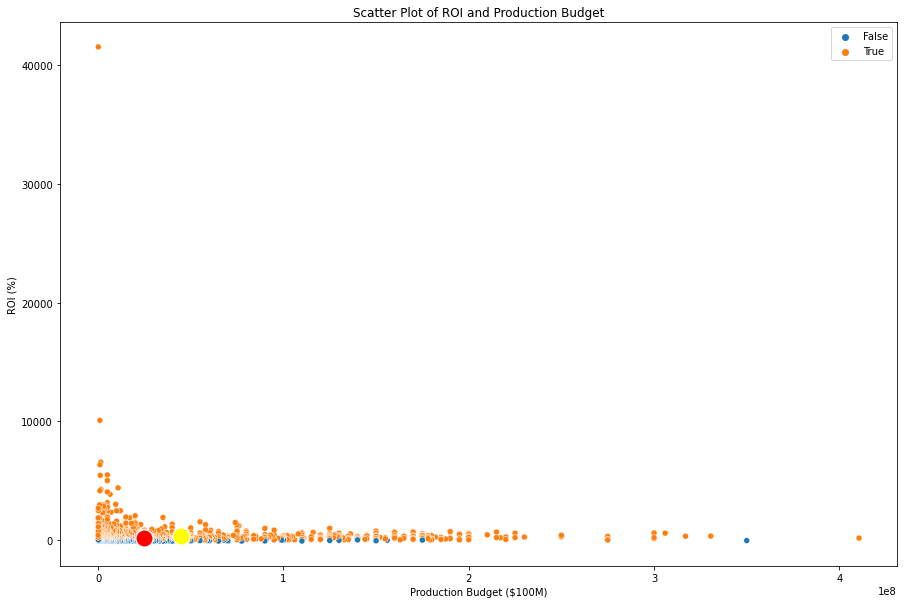

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=tnum_df_clean, x="production_budget_int", y='ROI_perc', hue='is_profit')

sns.scatterplot(data=median_roi, y='median_roi', x='median_expense', s=300, color='red')
sns.scatterplot(data=mean_roi, y='mean_roi', x='mean_expense', s=300, color='yellow')

ax.set_xlabel('Production Budget ($100M)')
ax.set_ylabel('ROI (%)')
ax.set_title('Scatter Plot of ROI and Production Budget');
# ax.set_xticklabels();

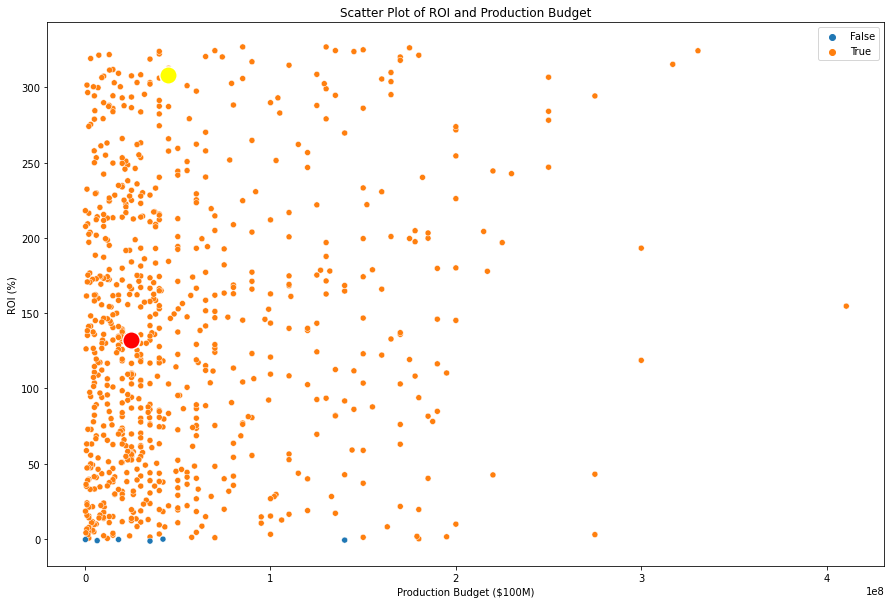

In [26]:
#  Plotting a Scatter plot of the production budgets vs. ROI in IQR
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(data=iqr_ROI, x="production_budget_int", y='ROI_perc', hue='is_profit')

sns.scatterplot(data=median_roi, y='median_roi', x='median_expense', s=300, color='red')
sns.scatterplot(data=mean_roi, y='mean_roi', x='mean_expense', s=300, color='yellow')

ax.set_xlabel('Production Budget ($100M)')
ax.set_ylabel('ROI (%)')
ax.set_title('Scatter Plot of ROI and Production Budget');
# ax.set_xticklabels();

In [27]:

# fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2)

# ax1.boxplot(tnum_df_clean['production_budget_int'], vert=False, showfliers=False)
# ax2.boxplot(tnum_df_clean['profit_amount'], vert=False, showfliers=False);

## Part 5 - Bar Plots: Median Profit Measures by Month

In [28]:
# Create a Month DateTime column of the release dates
tnum_df_clean['month_dt'] = pd.to_datetime(tnum_df_clean['release_date']).dt.month

In [29]:
# Create a Month string column of the release dates
tnum_df_clean['month'] = tnum_df_clean['release_date'].str[0:3]

In [30]:
# Create a new data frame grouped by months and their median values.
month_df = tnum_df_clean.groupby('month').median()

# Reset the index
month_df = month_df.reset_index()

# Sort the months in order
month_df = month_df.sort_values('month_dt')

In [31]:
# Let's take a look
month_df

,month,id,year,production_budget_int,worldwide_gross_int,profit_amount,ROI_perc,profit_margin_perc,is_profit,month_dt
4,Jan,50.0,2015.0,25000000.0,56178935.0,27666013.0,138.330065,58.041383,True,1.0
3,Feb,49.0,2015.0,30000000.0,62599159.0,34156610.0,158.562615,61.324649,True,2.0
7,Mar,50.0,2015.0,25000000.0,42195766.0,21028230.0,114.289910,53.334247,True,3.0
0,Apr,50.0,2014.0,18000000.0,27000381.0,8197072.0,87.655671,46.710910,True,4.0
8,May,48.5,2014.0,33750000.0,75643558.0,43969543.0,159.238899,61.418284,True,5.0
6,Jun,51.0,2015.0,28000000.0,66950887.0,28527161.0,135.895145,57.608284,True,6.0
5,Jul,52.0,2014.0,30000000.0,96407655.0,57956618.0,213.854853,68.138138,True,7.0
1,Aug,54.5,2014.0,23500000.0,54821423.0,25735740.5,110.706824,52.539034,True,8.0
11,Sep,47.0,2014.0,20000000.0,37119358.0,14385836.0,106.481600,51.569535,True,9.0
10,Oct,51.0,2014.0,15000000.0,23311293.0,7980196.0,74.379186,42.653706,True,10.0


In [32]:
# Graphing Parameters
month = month_df['month']
profit_amount = month_df['profit_amount']
ROI = month_df['ROI_perc']
wwgross = month_df['worldwide_gross_int']

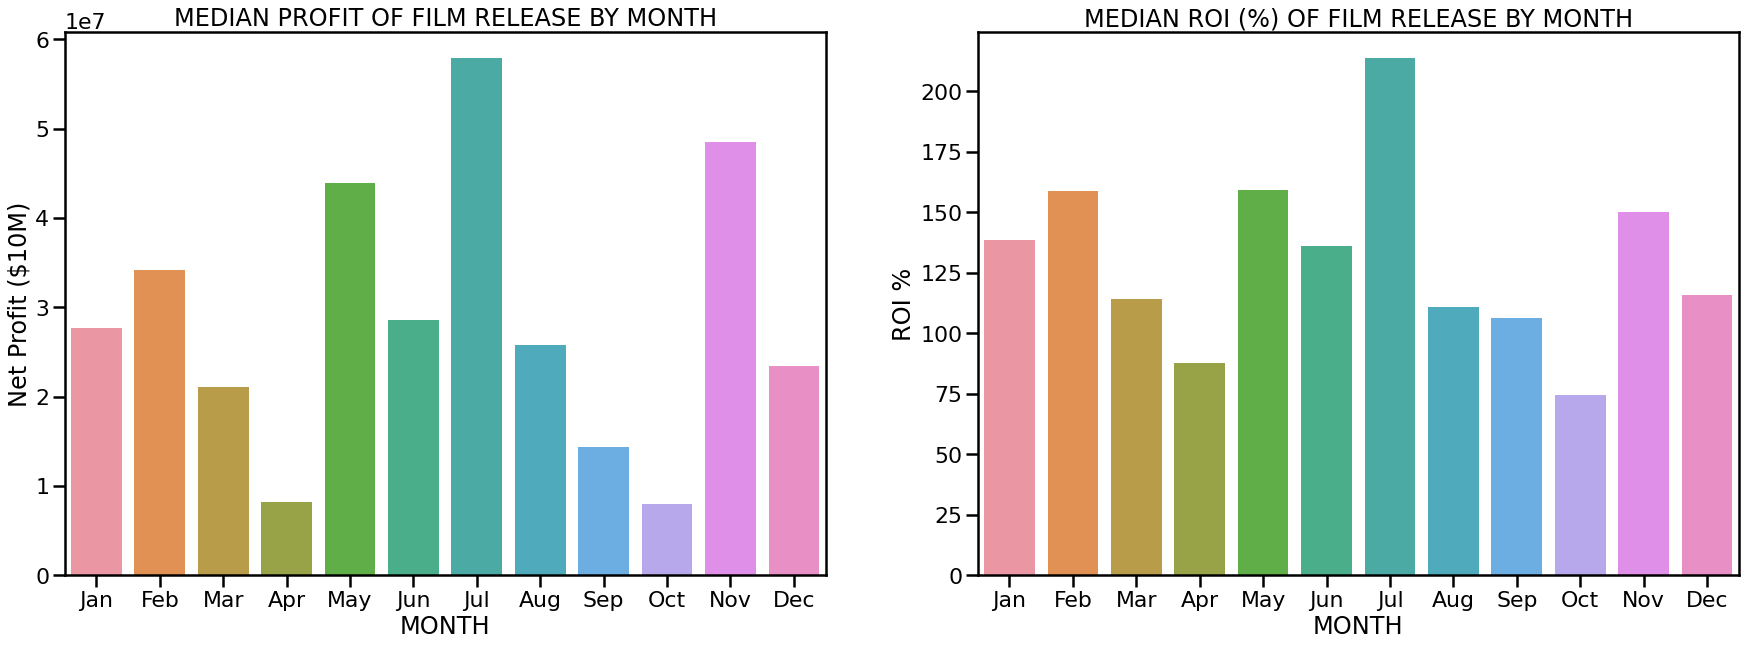

In [43]:
# Graph a barplot with months on the x axis and median profit margin amount on the y axis
fig, axs = plt.subplots(figsize=(30,10), ncols=2)

sns.barplot(x=month, y=profit_amount, ax=axs[0])
sns.barplot(x=month, y=ROI, ax=axs[1])
sns.set_context("poster")

axs[0].set_xlabel('MONTH')
axs[0].set_ylabel('Net Profit ($10M)')
axs[0].set_title(label='MEDIAN PROFIT OF FILM RELEASE BY MONTH')

axs[1].set_xlabel('MONTH')
axs[1].set_ylabel('ROI %')
axs[1].set_title(label='MEDIAN ROI (%) OF FILM RELEASE BY MONTH');

# Initial Thoughts

The bar plots give insight as to when the best month to release a movie in the box office are. It has to be taken with a grain of salt though, because we are looking at the median ROI and profit from the films released by month. I believe further measures need to be taken to see if the month a film releases is actually correlated to its profitability. 

---

Further Exploration....

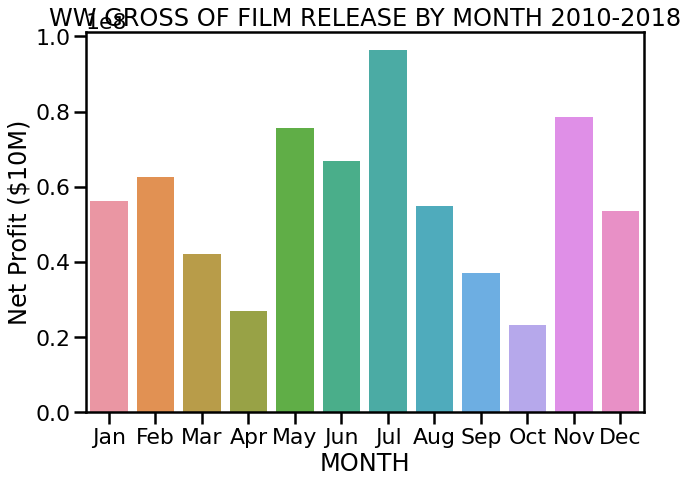

In [34]:
# Looking at Gross as well.
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(x=month, y=wwgross)


ax.set_xlabel('MONTH')
ax.set_ylabel('Net Profit ($10M)')
ax.set_title(label='WW GROSS OF FILM RELEASE BY MONTH 2010-2018');

In [35]:
# Create a DateTime column of the release dates
tnum_df_clean['datetime'] = pd.to_datetime(tnum_df_clean['release_date'])

In [36]:
# Create a DateTime column of the release dates
tnum_df_clean['datetime_i'] = tnum_df_clean['datetime'].dt.day_name()
tnum_df_clean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,production_budget_int,worldwide_gross_int,profit_amount,ROI_perc,profit_margin_perc,is_profit,month_dt,month,datetime,datetime_i
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,410600000,1045663875,635063875,154.667286,60.733080,True,5,May,2011-05-20,Friday
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,350000000,149762350,-200237650,-57.210757,-133.703598,False,6,Jun,2019-06-07,Friday
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,330600000,1403013963,1072413963,324.384139,76.436443,True,5,May,2015-05-01,Friday
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,317000000,1316721747,999721747,315.369636,75.925058,True,12,Dec,2017-12-15,Friday
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015,306000000,2053311220,1747311220,571.016739,85.097242,True,12,Dec,2015-12-18,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5672,73,"Jun 15, 2012",Your Sister's Sister,"$120,000","$1,597,486","$3,090,593",2012,120000,3090593,2970593,2475.494167,96.117250,True,6,Jun,2012-06-15,Friday
5679,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,100000,41656474,41556474,41556.474000,99.759941,True,7,Jul,2015-07-10,Friday
5685,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798","$2,769,782",2017,100000,2769782,2669782,2669.782000,96.389608,True,7,Jul,2017-07-07,Friday
5737,38,"Mar 18, 2016",Krisha,"$30,000","$144,822","$144,822",2016,30000,144822,114822,382.740000,79.284915,True,3,Mar,2016-03-18,Friday


In [37]:
day_df = tnum_df_clean.groupby('datetime_i').count()

In [38]:
day_counts = tnum_df_clean.value_counts('datetime_i')

In [39]:
type(day_counts)

pandas.core.series.Series

In [40]:
day_counts.to_frame()

,0
datetime_i,
Friday,1347
Wednesday,110
Tuesday,47
Thursday,23
Sunday,9
Saturday,5
Monday,4


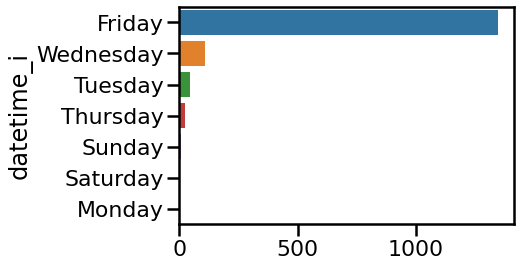

In [42]:
# fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(x=day_counts, y=day_counts.index);

ax.set_xlabel('MONTH')
ax.set_ylabel('Net Profit ($10M)')
ax.set_title(label='WW GROSS OF FILM RELEASE BY MONTH 2010-2018');
